In [1]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv(r"C:\Users\mail2\OneDrive\Desktop\ML-2022\Ml_Data\Bmi_male_female.csv")

In [3]:
#pwd

In [4]:
#data.describe()
#data.info()

In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
X_male=data[data["Gender"]=="Male"]
x_female=data[data["Gender"]=="Female"]

In [7]:
len(X_male)

245

In [8]:
len(x_female)

255

In [9]:
X_male_index=X_male[X_male["Index"]==2]

In [10]:
X_male_index.shape

(28, 4)

In [11]:
#data.hist()
#plt.show()

In [12]:
#sb.countplot("Gender",data=data,hue="Index")
#plt.show()

In [13]:
# SEPARATE 
data.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [14]:
X_GHW=data.iloc[:,0:3]
Y_index=data.iloc[:,3]

In [15]:
#X_GHW
#Y_index
print("type of X_GHW {} and  Y_index {}".format(type(X_GHW),type(Y_index)))

type of X_GHW <class 'pandas.core.frame.DataFrame'> and  Y_index <class 'pandas.core.series.Series'>


In [16]:
X_GHW.head(1)

,Gender,Height,Weight
0,Male,174,96


#### encoding male:1 and female:0

In [17]:
X_GHW.Gender[X_GHW["Gender"]=="Male"]=X_GHW.Gender[X_GHW["Gender"]=="Male"]=0
X_GHW.Gender[X_GHW["Gender"]=="Female"]=X_GHW.Gender[X_GHW["Gender"]=="Female"]=1
#X_GHW.Gender[X_GHW["Gender"]=="Male"]=1

C:\Users\mail2\AppData\Local\Temp\ipykernel_22912\645558885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_GHW.Gender[X_GHW["Gender"]=="Male"]=X_GHW.Gender[X_GHW["Gender"]=="Male"]=0
C:\Users\mail2\AppData\Local\Temp\ipykernel_22912\645558885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_GHW.Gender[X_GHW["Gender"]=="Female"]=X_GHW.Gender[X_GHW["Gender"]=="Female"]=1


In [18]:
#X_GHW

In [19]:
my_index=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [20]:
#my_index

In [21]:
XA=X_GHW.values
Ya=Y_index.values

In [22]:
n=int(len(XA)*.70)
Xtrain=XA[:n]
Xtest=XA[n:]
Ytrain=Ya[:n]
Ytest=Ya[n:]

In [23]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [24]:
Knn_leaner=knn_model.fit(Xtrain,Ytrain)

In [25]:
result=Knn_leaner.predict([[1,162,47]])

In [26]:
my_index[result]

2    Normal
dtype: object

In [27]:
#Test

In [28]:
Yp=knn_model.predict(Xtest)

In [29]:
len(Yp)

150

In [34]:
#pd.DataFrame({"Yp":Yp,"Ya":Ytest})

# from sklearn.metrics import accuracy_score

In [32]:
acc_score=accuracy_score(Ytest,Yp)*100
acc_score

91.33333333333333

## acc vs k 

In [38]:
k_n=int(np.sqrt(len(Xtrain)))
k_n

18

In [39]:
k_value=list(range(1,19))
k_value

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [42]:
list_acc=[]
for i in k_value:
    model_knn_update=KNeighborsClassifier(n_neighbors=i)
    learner_update=model_knn_update.fit(Xtrain,Ytrain)
    YP_update=learner_update.predict(Xtest)
    acc_update=accuracy_score(YP_update,Ytest)
    list_acc.append(acc_update)
    #print("acc is {} at vale k {}".format(acc_update,i))


In [43]:
from matplotlib import pyplot as plt

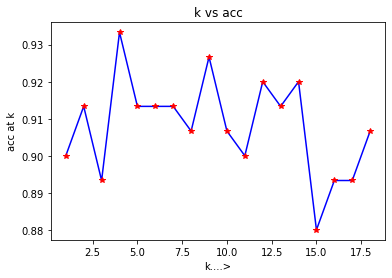

In [46]:
plt.plot(k_value,list_acc,'b')
plt.plot(k_value,list_acc,'r*')
plt.xlabel("k....>")
plt.ylabel("acc at k")
plt.title("k vs acc")
plt.show()